### Aprendizagem Automatica Avancada
#### Trabalho Laboratorial Nº1
#### Dataset CIFAR-10

# Import libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import tensorflow.keras as keras
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
import numpy.random as rnd
import itertools
from time import time
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Import Data

In [3]:
cifar10=keras.datasets.cifar10
(Xtrain,ytrain), (Xtest,ytest)=cifar10.load_data()

# Data exploration

In [4]:
print("Shapes")  #imagens devem estar no formato de vetor
print('Training set:\n',Xtrain.shape, ytrain.shape) #shape deve ser (50000, 32*32) e (50000,)
print('Test set:\n', Xtest.shape, ytest.shape) # imagens with colors, convert to grayscale?

Shapes
Training set:
 (50000, 32, 32, 3) (50000, 1)
Test set:
 (10000, 32, 32, 3) (10000, 1)


In [5]:
print("Dtypes") #imagens devem estar no formato float
print('Training set:\n',Xtrain.dtype, ytrain.dtype) 
print('Test set:\n', Xtest.dtype, ytest.dtype) 

Dtypes
Training set:
 uint8 uint8
Test set:
 uint8 int32


### Sample

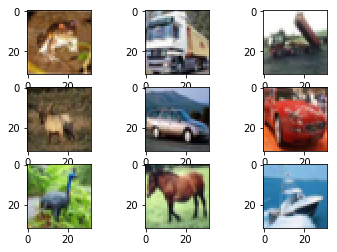

In [6]:
# plot first few images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(Xtrain[i])

plt.show()

# Pre-processing 

### 1.Passar de matriz para um lista

In [7]:
print("ytrain:", ytrain, "Dimensoes:", ytrain.shape)
print("ytest:", ytest, " Dimensoes:", ytest.shape)

ytrain: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]] Dimensoes: (50000, 1)
ytest: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]  Dimensoes: (10000, 1)


In [8]:
ytrain = ytrain.squeeze()
ytest = ytest.squeeze()

In [9]:
print("ytrain:", ytrain, "Dimensoes:", ytrain.shape)
print("ytest:", ytest, " Dimensoes:", ytest.shape)

ytrain: [6 9 9 ... 9 1 1] Dimensoes: (50000,)
ytest: [3 8 8 ... 5 1 7]  Dimensoes: (10000,)


### 2. Shuffle training data and sort test data

In [10]:
# Utilizar a funcao permutation() para fazer shuffle nos dados
idx = rnd.permutation(Xtrain.shape[0])
Xtrain = Xtrain[idx]
ytrain = ytrain[idx]

In [11]:
# Ordenar os dados de teste
idx = np.argsort(ytest)
Xtest = Xtest[idx]
ytest = ytest[idx]

### 3.Converter imagens com cores para imagens a cinzento

(50000, 32, 32)


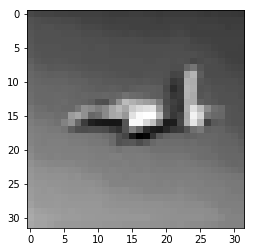

In [12]:
import cv2

def to_gray(data):
    # Matriz temporaria de [50000, 32, 32]
    data_Gray = np.zeros((data.shape[0], data.shape[1], data.shape[2]))  
    
    for i in range(data.shape[0]):
         #Transforma uma imagem a cores em cinzento (gray)
        data_Gray[i] = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY) 
    return data_Gray


XtrainGray = to_gray(Xtrain)
print(XtrainGray.shape)     # Confirmar as dimensoes da matriz ()
plt.imshow(XtrainGray[1], cmap='gray')   #Exemplo de uma imagem em cinzento (gray)
plt.show()

(10000, 32, 32)


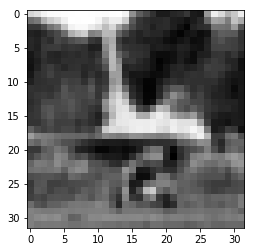

In [13]:
XtestGray = to_gray(Xtest)
print(XtestGray.shape)      # Confirmar pelas dimensoes da matriz , se a imagem esta em cinzento (gra)
plt.imshow(XtestGray[1],cmap='gray')    # Exemplo de uma imagem em cinzento (gray)
plt.show()

### 4. Converter imagens em vetores 
Imagens devem ser convertidas em vetores porque os algoritmos de classificacao utilizam este formato

Reshape() - funcao que modifica as dimensoes dos dados (XtrainGray e XtestGray) <br>
X_train =(50000, 1024) e X_test = (10000, 1024) <br>
Multiplicacao do resultado por 1.0 para transformar valores dos tipo uint8 para valores do tipo float

In [14]:
X_train = XtrainGray.reshape((XtrainGray.shape[0], XtrainGray.shape[1]**2)) * 1.0
X_test = XtestGray.reshape((XtestGray.shape[0], XtestGray.shape[1]**2)) * 1.0

print('Training set:',X_train.shape,X_train.dtype)
print('Test set:    ',X_test.shape,X_test.dtype)

Training set: (50000, 1024) float64
Test set:     (10000, 1024) float64



#### 1.  Na tarefa de classificacao binaria, considere os exemplos da classe ”ship”(embarcacao) como exemplos positivos e as imagens das restantes classes como exemplos negativos.

#### Como saber qual é a classe Embarcacao?
##### Exemplo de uma classe Embarcacao

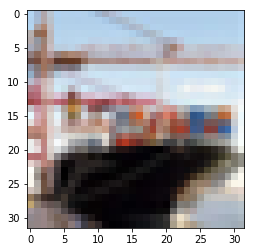

In [15]:
for i, num in enumerate(ytrain):
    if num == 8:
        plt.imshow(Xtrain[i])
        plt.show()
        break

### Index 8 - create the target vectors the problem

In [16]:
ytrainb=(ytrain==8)*1  
ytestb=(ytest==8)*1


#### 2. Na tarefa de classificacao binaria treine, teste e compare dois classificadores a sua escolha.


In [17]:
from IPython.display import Image
Image(url= "imgem.JPG")

#### Foram escolhido os classificadores LinearSVC e RandomFLorest porque alem de existerem menos de 100 mil amostras categorizadas, o problema é um problema de classificacao (binario ou multi-class) 

### 2.1 Treinar e testar os dois classificadores

#### 2.1.1 Linear Support Vector Classification (LSVC)

In [ ]:
#def svc_train_test(X_train, ytrain, X_test):
st=time()
SVC_model=LinearSVC().fit(X_train, ytrain)
ytest_predict_LSVC=SVC_model.predict(X_test)
print("O tempo que o algoritmo demora e:", time()-st)
#return ytest_predict_LSVC, SVC_model
    
#ytest_predict_LSVC, SVC_model = svc_train_test(X_train, ytrainb, X_test)

#### 2.1.2 Random Florest classifier

In [ ]:
#def randomFC_train_test(X_train, ytrain, X_test):
st=time()
rand_model = RandomForestClassifier(n_estimators=10).fit(X_train, ytrain)
ytest_predict_rand=rand_model.predict(X_test)
print("O tempo que o algoritmo demora e:", time()-st)
#return ytest_predict_rand, rand_model

#ytest_predict_rand, rand_model = randomFC_train_test(X_train, ytrainb, X_test)

### 2.2 Avaliar a performace do classificador

##### Funcoes uteis: plot da matriz de confucao e as metricas 

In [22]:
def confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(6,4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+ " = "+str(cm[i][j]))
    plt.show()

    
#def metrics(ytest, ytest_predict, ):
'''   
recall=np.sum(ytest_predict[ytest==1]==1)/(np.sum(ytest_predict[ytest==1]==1)+np.sum(ytest_predict[ytest==1]==0))
precision=np.sum(ytest_predict[ytest==1]==1)/(np.sum(ytest_predict[ytest==1]==1)+np.sum(ytest_predict[ytest==0]==1))
fp_rate=np.sum(ytest_predict[ytest==0]==1)/(np.sum(ytest_predict[ytest==0]==0)+np.sum(ytest_predict[ytest==0]==1))
print('Recall: %3f \nPrecision: %3f \nFP-rate: %3f'%(recall, precision, fp_rate))
print(classification_report(ytest, ytest_predict))
'''
#return recall, precision, fp_rate



In [23]:
# 2. Avaliar a performace do modelo
from sklearn.metrics import recall_score, precision_score

def evaluate_performance(model, X_test, ytest, ytest_predict):
    print("O score dos algoritmo em percentagem:", 100*model.score(X_test, ytest))
    metrics(ytest, ytest_predict)
    
    print('Numero total de errors:', np.sum(ytest!=ytest_predict)) 
    confusio_matrix(ytest, ytest_predict)
    return confusion_matrix(ytest, ytest_predict)


#### 2.2.1 Linear Support Vector Classification (SVC)

O score dos algoritmo em percentagem: 81.10000000000001
Recall: 0.380000 
Precision: 0.230303 
FP-rate: 0.141111
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      9000
           1       0.23      0.38      0.29      1000

    accuracy                           0.81     10000
   macro avg       0.58      0.62      0.59     10000
weighted avg       0.86      0.81      0.83     10000

Numero total de errors: 1890


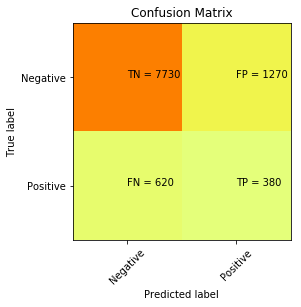

In [24]:
#CM1 = evaluate_performance(SVC_model, X_test, ytestb, ytest_predict_LSVC)
print("O score dos algoritmo em percentagem:", 100*SVC_model.score(X_test, ytestb))
#metrics(ytestb, ytest_predict_LSVC)

recall1=np.sum(ytest_predict_LSVC[ytestb==1]==1)/(np.sum(ytest_predict_LSVC[ytestb==1]==1)+np.sum(ytest_predict_LSVC[ytestb==1]==0))
precision1=np.sum(ytest_predict_LSVC[ytestb==1]==1)/(np.sum(ytest_predict_LSVC[ytestb==1]==1)+np.sum(ytest_predict_LSVC[ytestb==0]==1))
fp_rate1=np.sum(ytest_predict_LSVC[ytestb==0]==1)/(np.sum(ytest_predict_LSVC[ytestb==0]==0)+np.sum(ytest_predict_LSVC[ytestb==0]==1))
print(classification_report(ytestb, ytest_predict_LSVC))

print('Numero total de errors:', np.sum(ytestb!=ytest_predict_LSVC)) 
#confusio_matrix(ytest, ytest_predict)
CM1 = confusion_matrix(ytestb, ytest_predict_LSVC)
print(CM1)

### Comentario: No classificador LinearSVC podemos observar que consegue classificar bem os dados da labell 1 com 90% de precisao e 100% de recall, no entanto quando classifica os dados da label 0 (ship) nao consegem boa pontuacao nem na precisao (17%) nem no recall (0%) (positive samples) 

#### 2.2.2 Random Florest classifier

O score dos algoritmo em percentagem: 90.86
Recall: 0.169000 
Precision: 0.670635 
FP-rate: 0.009222
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9000
           1       0.67      0.17      0.27      1000

    accuracy                           0.91     10000
   macro avg       0.79      0.58      0.61     10000
weighted avg       0.89      0.91      0.88     10000

Numero total de errors: 914


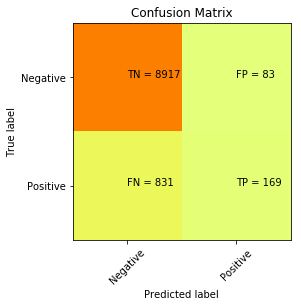

In [25]:
#CM2 = evaluate_performance(rand_model, X_test, ytestb, ytest_predict_rand)
print("O score dos algoritmo em percentagem:", 100*rand_model.score(X_test, ytestb))

recall2=np.sum(ytest_predict_rand[ytestb==1]==1)/(np.sum(ytest_predict_rand[ytestb==1]==1)+np.sum(ytest_predict_rand[ytestb==1]==0))
precision2=np.sum(ytest_predict_rand[ytestb==1]==1)/(np.sum(ytest_predict_rand[ytestb==1]==1)+np.sum(ytest_predict_rand[ytestb==0]==1))
fp_rate2=np.sum(ytest_predict_rand[ytestb==0]==1)/(np.sum(ytest_predict_rand[ytestb==0]==0)+np.sum(ytest_predict_rand[ytestb==0]==1))
print(classification_report(ytestb, ytest_predict_rand))


print('Numero total de errors:', np.sum(ytestb!=ytest_predict_rand)) 
#confusio_matrix(ytest, ytest_predict)
CM1 = confusion_matrix(ytestb, ytest_predict_rand)

### Comentario: O classificador Raandom Florest obteve bons dados ao classificar a label 0 e pior qualidade ao classificar os dados da label 1 (ship)


### 2.3 Roc curve

Recall: 0.380000 
Precision: 0.230303 
FP-rate: 0.141111
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      9000
           1       0.23      0.38      0.29      1000

    accuracy                           0.81     10000
   macro avg       0.58      0.62      0.59     10000
weighted avg       0.86      0.81      0.83     10000

Recall: 0.014599 
Precision: 1.000000 
FP-rate: 0.000000


ValueError: Classification metrics can't handle a mix of binary and continuous targets

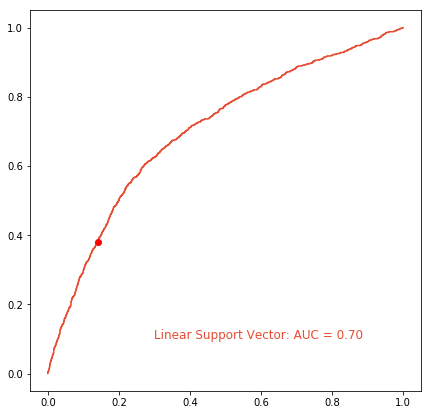

In [30]:
import sklearn.metrics as skm

plt.figure(figsize=(7,7))

### Linear Support Vector Classification
model_e=SVC_model.decision_function(X_test)
fp1, tp1, t1=skm.roc_curve(ytestb, model_e)

recall1=np.sum(ytest_predict_LSVC[ytestb==1]==1)/(np.sum(ytest_predict_LSVC[ytestb==1]==1)+np.sum(ytest_predict_LSVC[ytestb==1]==0))
precision1=np.sum(ytest_predict_LSVC[ytestb==1]==1)/(np.sum(ytest_predict_LSVC[ytestb==1]==1)+np.sum(ytest_predict_LSVC[ytestb==0]==1))
fp_rate1=np.sum(ytest_predict_LSVC[ytestb==0]==1)/(np.sum(ytest_predict_LSVC[ytestb==0]==0)+np.sum(ytest_predict_LSVC[ytestb==0]==1))


plt.plot(fp1, tp1, color=[0.9,0.3,0.2]) 
plt.plot(precision1,recall1,'or')
plt.text(.3,.10,'Linear Support Vector: AUC = %0.2f' % skm.auc(fp1, tp1), fontsize=12, color=[0.9,0.3,0.2])

## Random Florest
model_RF=rand_model.predict_proba(X_test)[:,1]
fp2, tp2, t2=skm.roc_curve(ytestb, model_RF)

recall2=np.sum(ytest_predict_rand[ytestb==1]==1)/(np.sum(ytest_predict_rand[ytestb==1]==1)+np.sum(ytest_predict_rand[ytestb==1]==0))
precision2=np.sum(ytest_predict_rand[ytestb==1]==1)/(np.sum(ytest_predict_rand[ytestb==1]==1)+np.sum(ytest_predict_rand[ytestb==0]==1))
fp_rate2=np.sum(ytest_predict_rand[ytestb==0]==1)/(np.sum(ytest_predict_rand[ytestb==0]==0)+np.sum(ytest_predict_rand[ytestb==0]==1))

plt.plot(fp2, tp2, color=[.3,.6,.1])
plt.plot(precision2, recall2, 'og')
plt.text(.3,.05,'Random Florest: AUC = %0.2f' % skm.auc(fp2, tp2) ,fontsize=12,color=[.3,.6,.1])


plt.xlabel("False Positive Rate")  #fp / (fp + tn)
plt.ylabel("True Positive Rate")   #Recall
plt.grid(True)
plt.show()


### Comentario: Ao observarmos as duas roc curves podemos verificar que o classificador que melhor conseguiu classsificar a classe "ship" foi o classificador Random Florest

### 3. Na tarefa de classificacao multi-classe treine e teste um classificador a sua escolha.
    * Treinar e testar o classificardor Random Florest

In [151]:
#ytest_predict_rand, rand_model = randomFC_train_test(X_train, ytrain, X_test)
st=time()
rand_model = RandomForestClassifier(n_estimators=10).fit(X_train, ytrain)
ytest_predict_rand=rand_model.predict(X_test)
print("O tempo que o algoritmo demora e:", time()-st)

O tempo que o algoritmo demora e: 13.982081413269043


    * Avalicao da performace do classificador

#### Funcoes uteis

In [154]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    fig = plt.figure(figsize=(6.5, 6.5))
    plt.imshow(cm, interpolation="none", cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#def evaluate_performance(model, X_test, ytest, ytest_predict):
    print("O score dos algoritmo em percentagem:", 100*model.score(X_test, ytest))
    metrics(ytest, ytest_predict)
    
    print('Numero total de errors:', np.sum(ytest!=ytest_predict)) 
    #confusio_matrix(ytest, ytest_predict)
    return confusion_matrix(ytest, ytest_predict)

O score dos algoritmo em percentagem: 32.12
Recall: 0.853955 
Precision: 0.880753 
FP-rate: 0.105166
              precision    recall  f1-score   support

           0       0.33      0.48      0.40      1000
           1       0.34      0.42      0.37      1000
           2       0.23      0.29      0.26      1000
           3       0.23      0.23      0.23      1000
           4       0.26      0.26      0.26      1000
           5       0.32      0.27      0.29      1000
           6       0.32      0.27      0.29      1000
           7       0.37      0.26      0.30      1000
           8       0.46      0.39      0.42      1000
           9       0.41      0.34      0.37      1000

    accuracy                           0.32     10000
   macro avg       0.33      0.32      0.32     10000
weighted avg       0.33      0.32      0.32     10000

Numero total de errors: 6788
Confusion matrix, without normalization


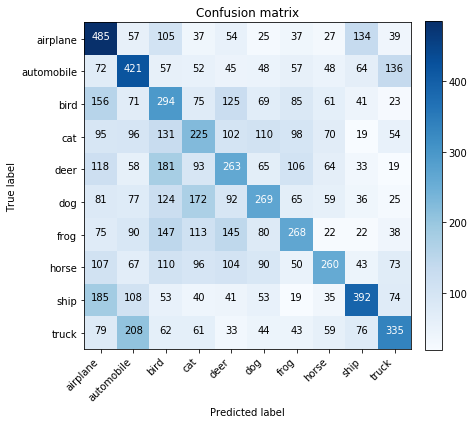

In [157]:

#CM3 = evaluate_performance(rand_model, X_test, ytest, ytest_predict_rand)
#     def    evaluate_performance(model, X_test, ytest, ytest_predict):
print("O score dos algoritmo em percentagem:", 100*model.score(X_test, ytest))
#metrics(ytest, ytest_predict)
recall2=np.sum(ytest_predict_rand[ytest==1]==1)/(np.sum(ytest_predict_rand[ytest==1]==1)+np.sum(ytest_predict_rand[ytest==1]==0))
precision2=np.sum(ytest_predict_rand[ytest==1]==1)/(np.sum(ytest_predict_rand[ytest==1]==1)+np.sum(ytest_predict_rand[ytest==0]==1))
fp_rate2=np.sum(ytest_predict_rand[ytest==0]==1)/(np.sum(ytest_predict_rand[ytest==0]==0)+np.sum(ytest_predict_rand[ytest==0]==1))


print('Numero total de errors:', np.sum(ytest!=ytest_predict_rand)) 
#confusio_matrix(ytest, ytest_predict)
CM3 = confusion_matrix(ytest, ytest_predict_rand)


plot_confusion_matrix(CM3, classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", 
                                    "horse", "ship", "truck",])

#### 4. Em ambas as tarefas de classificacao verifique se normalizar os dados (dados com media numa e variancia unitaria) e benefico. 
    * 4.1 Normalizacao

In [158]:
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skm

ss = StandardScaler().fit(X_train)
X_trains = ss.transform(X_train)
X_tests = ss.transform(X_test)


### 4.1 Binary classification

### Linear Support Vector Classification 

In [159]:
#ytest_predict_LSVC, SVC_model = svc_train_test(X_trains, ytrainb)
st=time()
SVC_model=LinearSVC().fit(X_trains, ytrainb)
ytest_predict_LSVC=SVC_model.predict(X_test)
print("O tempo que o algoritmo demora e:", time()-st)


O tempo que o algoritmo demora e: 146.12061667442322


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [160]:
#CM11 = evaluate_performance(SVC_model, X_tests, ytestb, ytest_predict_LSVC)

print("O score dos algoritmo em percentagem:", 100*SVC_model.score(X_tests, ytestb))
#metrics(ytestb, ytest_predict_LSVC)

recall1=np.sum(ytest_predict_LSVC[ytestb==1]==1)/(np.sum(ytest_predict_LSVC[ytestb==1]==1)+np.sum(ytest_predict_LSVC[ytestb==1]==0))
precision1=np.sum(ytest_predict_LSVC[ytestb==1]==1)/(np.sum(ytest_predict_LSVC[ytestb==1]==1)+np.sum(ytest_predict_LSVC[ytestb==0]==1))
fp_rate1=np.sum(ytest_predict_LSVC[ytestb==0]==1)/(np.sum(ytest_predict_LSVC[ytestb==0]==0)+np.sum(ytest_predict_LSVC[ytestb==0]==1))
print(classification_report(ytestb, ytest_predict_LSVC))

print('Numero total de errors:', np.sum(ytestb!=ytest_predict_LSVC)) 
#confusio_matrix(ytest, ytest_predict)
CM11 = confusion_matrix(ytestb, ytest_predict_LSVC)

print(CM11)

O score dos algoritmo em percentagem: 89.47
Recall: 0.887000 
Precision: 0.112052 
FP-rate: 0.781000
              precision    recall  f1-score   support

           0       0.95      0.22      0.36      9000
           1       0.11      0.89      0.20      1000

    accuracy                           0.29     10000
   macro avg       0.53      0.55      0.28     10000
weighted avg       0.86      0.29      0.34     10000

Numero total de errors: 7142
[[1971 7029]
 [ 113  887]]


#### Random Florest

In [163]:
#ytest_predict_rand, rand_model = randomFC_train_test(X_trains, ytrainb, X_test)
st=time()
rand_model = RandomForestClassifier(n_estimators=10).fit(X_trains, ytrainb)
ytest_predict_rand=rand_model.predict(X_test)
print("O tempo que o algoritmo demora e:", time()-st)

O tempo que o algoritmo demora e: 13.220634698867798


In [164]:
#CM22 = evaluate_performance(rand_model, X_tests, ytestb, ytest_predict_rand)

print("O score dos algoritmo em percentagem:", 100*model.score(X_tests, ytestb))
#metrics(ytest, ytest_predict)
recall2=np.sum(ytest_predict_rand[ytestb==1]==1)/(np.sum(ytest_predict_rand[ytestb==1]==1)+np.sum(ytest_predict_rand[ytestb==1]==0))
precision2=np.sum(ytest_predict_rand[ytestb==1]==1)/(np.sum(ytest_predict_rand[ytestb==1]==1)+np.sum(ytest_predict_rand[ytestb==0]==1))
fp_rate2=np.sum(ytest_predict_rand[ytestb==0]==1)/(np.sum(ytest_predict_rand[ytestb==0]==0)+np.sum(ytest_predict_rand[ytestb==0]==1))


print('Numero total de errors:', np.sum(ytestb!=ytest_predict_rand)) 
#confusio_matrix(ytest, ytest_predict)
CM3 = confusion_matrix(ytestb, ytest_predict_rand)

print(CM22)

O score dos algoritmo em percentagem: 90.68
Recall: 0.000000 
Precision: 0.000000 
FP-rate: 0.000667
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000

Numero total de errors: 1006
[[8994    6]
 [1000    0]]


In [165]:
# Resultados do binary 

#### Multi-classe

In [ ]:
# Random Florest
#ytest_predict_rand, rand_model = randomFC_train_test(X_train, ytrain, X_test)
st=time()
rand_model = RandomForestClassifier(n_estimators=10).fit(X_train, ytrain)
ytest_predict_rand=rand_model.predict(X_test)
print("O tempo que o algoritmo demora e:", time()-st)

In [ ]:
#Avaliacao
#CM33 = evaluate_performance(rand_model, X_test, ytest, ytest_predict_rand)

print("O score dos algoritmo em percentagem:", 100*model.score(X_tests, ytest))
#metrics(ytest, ytest_predict)
recall2=np.sum(ytest_predict_rand[ytest==1]==1)/(np.sum(ytest_predict_rand[ytest==1]==1)+np.sum(ytest_predict_rand[ytest==1]==0))
precision2=np.sum(ytest_predict_rand[ytest==1]==1)/(np.sum(ytest_predict_rand[ytest==1]==1)+np.sum(ytest_predict_rand[ytest==0]==1))
fp_rate2=np.sum(ytest_predict_rand[ytest==0]==1)/(np.sum(ytest_predict_rand[ytest==0]==0)+np.sum(ytest_predict_rand[ytest==0]==1))


print('Numero total de errors:', np.sum(ytest!=ytest_predict_rand)) 
#confusio_matrix(ytest, ytest_predict)
CM3 = confusion_matrix(ytest, ytest_predict_rand)

print(CM22)

In [37]:
# Resultados do Multi-class

    * 4.2 Compararcao de resultados

In [ ]:
## Linear Support Vector Classification

#decision Funtion
#y_test_SVC, SVC_decision = evaluate_decision_SVC(SVC_model, X_tests, lim=-1)

# recall, precision, fp_rate

#r1, p1, f1 = metrics(ytestb, y_test_SVC)


plt.figure(figsize=(7,7))

### Linear Support Vector Classification
model_e=SVC_model.decision_function(X_tests)
fp1, tp1, t1=skm.roc_curve(ytest, model_e)

recall1=np.sum(model_e[ytest==1]==1)/(np.sum(model_e[ytest==1]==1)+np.sum(model_e[ytest==1]==0))
precision1=np.sum(model_e[ytest==1]==1)/(np.sum(model_e[ytest==1]==1)+np.sum(model_e[ytest==0]==1))
fp_rate1=np.sum(model_e[ytest==0]==1)/(np.sum(model_e[ytest==0]==0)+np.sum(model_e[ytest==0]==1))

plt.plot(fp1, tp1, color=[0.9,0.3,0.2])          #linha
plt.plot(precision1,recall1,'or')  #ponto
plt.text(.3,.10,'Linear Support Vector: AUC = %0.2f' % skm.auc(fp1, tp1), fontsize=12, color=[0.9,0.3,0.2])

## Random Florest
model_RF=rand_model.predict_proba(X_tests)[:,1]
fp2, tp2, t2=skm.roc_curve(ytestb, model_RF)

recall2=np.sum(model_RF[ytest==1]==1)/(np.sum(model_RF[ytest==1]==1)+np.sum(model_RF[ytest==1]==0))
precision2=np.sum(model_RF[ytest==1]==1)/(np.sum(model_RF[ytest==1]==1)+np.sum(model_RF[ytest==0]==1))
fp_rate2=np.sum(model_RF[ytest==0]==1)/(np.sum(model_RF[ytest==0]==0)+np.sum(model_RF[ytest==0]==1))

plt.plot(fp2, tp2, color=[.3,.6,.1])
plt.plot(precision2, recall2, 'og')
plt.text(.3,.05,'Random Florest: AUC = %0.2f' % skm.auc(fp2, tp2) ,fontsize=12,color=[.3,.6,.1])

plt.xlabel("False Positive Rate")  #fp / (fp + tn)
plt.ylabel("True Positive Rate")   #Recall
plt.grid(True)
plt.show()


#### 5. Use os dados de treino para obter uma estimativa do desempenho dos classificadores e verifique se a estimativa condiz com os resultados obtidos com os dados de teste.


In [169]:
#             inicio,                   para gray,        
#(Xtrain, ytrain), (Xtest,ytest), (XtrainGray, XtestGray) 
#(X_train, ytrainb), (X_test, ytestb)  X - gray com reshape,  y- binary

#ytest_predict_LSVC, ytest_predict_SGDC
# modelos: sgd_model, SVC_model

#mulkti
#(X_train, ytrain), (X_test, ytest)

#### 5.1 Split do dados

In [167]:
from sklearn.model_selection import train_test_split

X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_trains, ytrain, train_size=.3, stratify=ytrain, random_state=42)


#### 5.2 Classificar os dados

In [168]:
rand_model = RandomForestClassifier(n_estimators=10).fit(X_trainN, y_trainN)
ytest_predict_randN=rand_model.predict(X_testN)

#### 5.3 verificar o desempenho com dos resultados com os dados de teste


In [178]:
X_trainN.shape,  y_trainN.shape, X_testN.shape,y_testN.shape, ytest_predict_randN.shape

((15000, 1024), (15000,), (35000, 1024), (35000,), (35000,))

In [182]:
# evaluate_performance(rand_model, X_testN, y_testN, ytest_predict_randN)
print("O score dos algoritmo em percentagem:", 100*rand_model.score(X_testN, y_testN))
#metrics(ytest, ytest_predict)
recall2=np.sum(ytest_predict_randN[y_testN==1]==1)/(np.sum(ytest_predict_randN[y_testN==1]==1)+np.sum(ytest_predict_randN[y_testN==1]==0))
precision2=np.sum(ytest_predict_randN[y_testN==1]==1)/(np.sum(ytest_predict_randN[y_testN==1]==1)+np.sum(ytest_predict_randN[y_testN==0]==1))
fp_rate2=np.sum(ytest_predict_randN[y_testN==0]==1)/(np.sum(ytest_predict_randN[y_testN==0]==0)+np.sum(ytest_predict_randN[y_testN==0]==1))


print('Numero total de errors:', np.sum(y_testN!=ytest_predict_randN)) 
#confusio_matrix(ytest, ytest_predict)
CM3 = confusion_matrix(y_testN, ytest_predict_randN)

print(CM22)

O score dos algoritmo em percentagem: 28.382857142857144
Recall: 0.798544 
Precision: 0.847938 
FP-rate: 0.136812
              precision    recall  f1-score   support

           0       0.28      0.43      0.34      3500
           1       0.30      0.38      0.33      3500
           2       0.21      0.26      0.24      3500
           3       0.20      0.19      0.20      3500
           4       0.24      0.25      0.24      3500
           5       0.26      0.22      0.24      3500
           6       0.28      0.23      0.26      3500
           7       0.34      0.25      0.29      3500
           8       0.41      0.33      0.37      3500
           9       0.38      0.30      0.34      3500

    accuracy                           0.28     35000
   macro avg       0.29      0.28      0.28     35000
weighted avg       0.29      0.28      0.28     35000

Numero total de errors: 25066


array([[1489,  236,  404,  142,  220,  106,  146,  145,  474,  138],
       [ 332, 1316,  178,  230,  177,  174,  207,  160,  220,  506],
       [ 590,  207,  923,  293,  463,  267,  317,  191,  141,  108],
       [ 353,  334,  489,  675,  359,  495,  344,  204,   95,  152],
       [ 426,  219,  596,  328,  865,  219,  363,  249,  146,   89],
       [ 333,  286,  478,  576,  351,  759,  242,  252,  119,  104],
       [ 293,  352,  526,  406,  517,  261,  819,  144,   67,  115],
       [ 395,  325,  390,  315,  375,  284,  215,  874,  135,  192],
       [ 769,  362,  193,  185,  163,  144,  103,  145, 1167,  269],
       [ 365,  766,  175,  198,  138,  172,  159,  200,  280, 1047]],
      dtype=int64)

#### 6. Na tarefa de classificac¸ao multi-classe, verifique se transformar os dados com PCA e benefico.    <br> Estime igualmente o numero adequado de componentes principais
#### 1. Transformar os dados com o PCA
    

In [183]:
#Transformar os dados
from sklearn.decomposition import PCA

pca=PCA(n_components=None).fit(X_trains)
X1p=pca.transform(X_trains)
X2p=pca.transform(X_tests)


#### 2. Verificar se é benefico (com dados normalizados)

#### Random Florest

In [184]:
# ytest_predict_rand, rand_model = randomFC_train_test(X1p, ytrain, X_test)
st=time()
rand_model = RandomForestClassifier(n_estimators=10).fit(X1p, ytrain)
ytest_predict_rand=rand_model.predict(X_test)
print("O tempo que o algoritmo demora e:", time()-st)

O tempo que o algoritmo demora e: 29.790128469467163


#### 3.Avaliar a perfomace dos classificadores e verificar se é benefico utilizar o pca

In [185]:
#CM33p = evaluate_performance(rand_model, X_test, ytest, ytest_predict_rand)
print("O score dos algoritmo em percentagem:", 100*rand_model.score(X_test, ytest))
#metrics(ytest, ytest_predict)
recall2=np.sum(ytest_predict_rand[ytest==1]==1)/(np.sum(ytest_predict_rand[ytest==1]==1)+np.sum(ytest_predict_rand[ytest==1]==0))
precision2=np.sum(ytest_predict_rand[ytest==1]==1)/(np.sum(ytest_predict_rand[ytest==1]==1)+np.sum(ytest_predict_rand[ytest==0]==1))
fp_rate2=np.sum(ytest_predict_rand[ytest==0]==1)/(np.sum(ytest_predict_rand[ytest==0]==0)+np.sum(ytest_predict_rand[ytest==0]==1))


print('Numero total de errors:', np.sum(ytest!=ytest_predict_rand)) 
#confusio_matrix(ytest, ytest_predict)
CM3 = confusion_matrix(ytest, ytest_predict_rand)

print(CM22)

O score dos algoritmo em percentagem: 10.02
Recall: 0.998989 
Precision: 0.500000 
FP-rate: 1.000000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      0.99      0.18      1000
           2       0.10      0.00      0.00      1000
           3       0.60      0.00      0.01      1000
           4       0.00      0.00      0.00      1000
           5       0.10      0.01      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.50      0.00      0.00      1000
           8       0.09      0.00      0.00      1000
           9       0.08      0.00      0.01      1000

    accuracy                           0.10     10000
   macro avg       0.16      0.10      0.02     10000
weighted avg       0.16      0.10      0.02     10000

Numero total de errors: 8998
[[  0 988   1   0   2   3   2   0   1   3]
 [  1 988   1   0   0   1   6   0   0   3]
 [  0 989   1   0   1   6

#### 4. Qual é o melhor numero de componentes principais?

In [186]:
pca.components_.shape

(1024, 1024)

##### Qual é o melhor numero de componentes principais?
##### Ver as 10 primeiras variancias dos dados
##### Podemos ver que a primeira corresponde a 30% das variabilidades

In [54]:
print(np.round(pca.explained_variance_ratio_, 2)[:10])


array([0.3 , 0.12, 0.08, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02, 0.01])

##### As primeiras 25 componentes explicam 81 % da variabilidade dos dados<br> Para ter uma variabilidade acima de 80% é necessario utilizar pelo menos 25 

In [68]:
np.sum(np.round(pca.explained_variance_ratio_, 2)[:25])


0.81

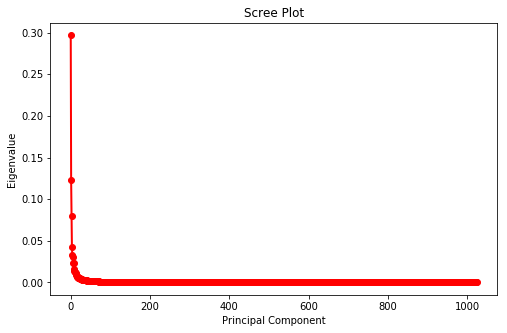

In [188]:
fig = plt.figure(figsize=(8,5))
plt.plot (pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()


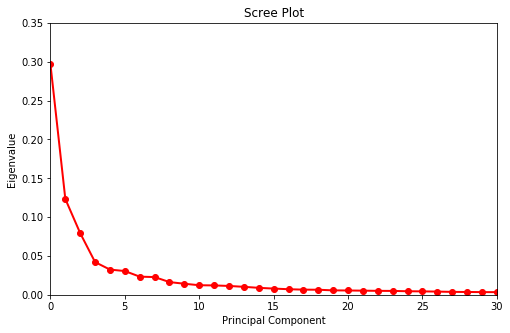

In [192]:

fig = plt.figure(figsize=(8,5))
plt.plot (pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlim([0, 30])
plt.ylim([0, 0.35])
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [ ]:
#### Verificou-se que o numero de compente 

In [210]:

from sklearn.decomposition import PCA

pca=PCA(n_components=50,whiten=True).fit(X_trains)
X1p=pca.transform(X_trains)
X2p=pca.transform(X_tests)


In [211]:
X1p.shape, X2p.shape, X_trains.shape, X_tests.shape, X1p.shape, ytrain.shape, X_test.shape

((50000, 50),
 (10000, 50),
 (50000, 1024),
 (10000, 1024),
 (50000, 50),
 (50000,),
 (10000, 1024))

In [212]:
#ytest_predict_rand, rand_model = randomFC_train_test(X1p, ytrain, X2p)
st=time()
rand_model = RandomForestClassifier(n_estimators=10).fit(X1p, ytrain)
ytest_predict_rand=rand_model.predict(X2p)
print("O tempo que o algoritmo demora e:", time()-st)

O tempo que o algoritmo demora e: 11.590857028961182


In [213]:
# 2.Avaliar a perfomace dos classificadores e verificar se é benefico utilizar o pca
#CM33pd = evaluate_performance(rand_model, X2p, ytest, ytest_predict_rand)
#CM33p = evaluate_performance(rand_model, X_test, ytest, ytest_predict_rand)
print("O score dos algoritmo em percentagem:", 100*rand_model.score(X1p, ytest))
#metrics(ytest, ytest_predict)
recall2=np.sum(X2p[ytest==1]==1)/(np.sum(X2p[ytest==1]==1)+np.sum(X2p[ytest==1]==0))
precision2=np.sum(X2p[ytest==1]==1)/(np.sum(X2p[ytest==1]==1)+np.sum(X2p[ytest==0]==1))
fp_rate2=np.sum(X2p[ytest==0]==1)/(np.sum(X2p[ytest==0]==0)+np.sum(X2p[ytest==0]==1))


print('Numero total de errors:', np.sum(ytest!=X2p)) 
#confusio_matrix(ytest, ytest_predict)
CM3 = confusion_matrix(ytest, X2p)

print(CM22)

O score dos algoritmo em percentagem: 29.82
Recall: 0.784114 
Precision: 0.827957 
FP-rate: 0.156556
              precision    recall  f1-score   support

           0       0.31      0.43      0.36      1000
           1       0.29      0.39      0.33      1000
           2       0.22      0.28      0.25      1000
           3       0.20      0.21      0.20      1000
           4       0.24      0.23      0.24      1000
           5       0.29      0.23      0.26      1000
           6       0.35      0.29      0.32      1000
           7       0.37      0.27      0.31      1000
           8       0.42      0.36      0.39      1000
           9       0.38      0.30      0.33      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.30     10000
weighted avg       0.31      0.30      0.30     10000

Numero total de errors: 7018
[[431  80  95  49  70  24  43  36 130  42]
 [106 385  52  67  45  44  52  38  78 133]
 [127  73 283  96 157  76